# *Satellite Image Analysis* #

<div style="text-align: center;">
    <img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2014/07/galileo_satellite_in_orbit/14632177-1-eng-GB/Galileo_satellite_in_orbit_pillars.jpg" alt="alzheimers" style="width:100%; height:70%; border-radius: 70px;">
</div>

## Basic EDA and Training the model 

### Importing the modules

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Loading the datset

In [26]:

path = "/kaggle/input/satellite-image-classification/data/"
batch_size = 32
height = 72
width = 128

In [27]:
#Loading the dataset and splitting into training and validation sets
train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

val = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


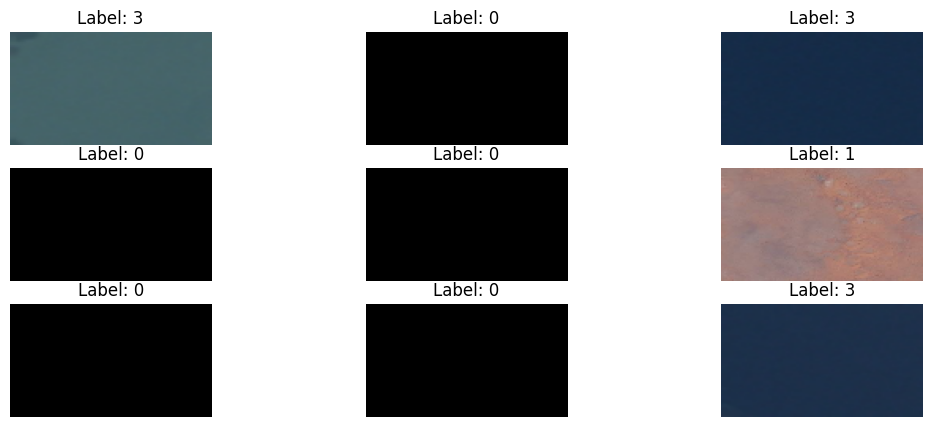

In [28]:
# Print the first images with their labels
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

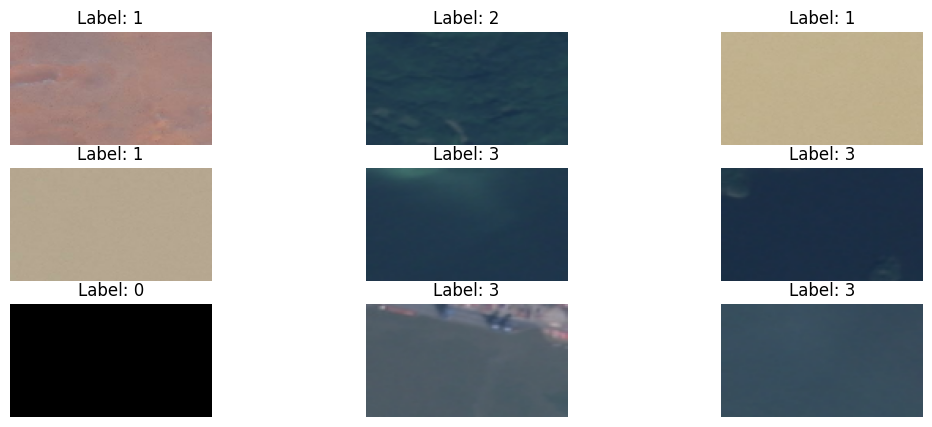

In [29]:

plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [30]:
amount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {amount} different Classes")

There are 4 different Classes


In [31]:
classes = {
    0: "cloudy",
    1: "desert",
    2: "water",
    3: "green_area"
}

## defining the model

In [32]:
# CNN model architecture
model = Sequential([
    layers.Input(shape=(height, width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(amount)
])

# The first layer has 16 filters, kernel size equal to 3
# The max pooling layer allows to reduce the spatial dimensions
# The 2D feature flattened to 1D vector allows to prepare for the fully connected layer
# The fully connected layer has 128 neurons
# The output layer has 4 neurons (because there are 4 different classes)

In [33]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
epochs = 20
history = model.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/20
 20/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5490 - loss: 1.0931

I0000 00:00:1734275306.878368     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1734275306.891819     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7597 - loss: 0.5575

W0000 00:00:1734275316.937567     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.7603 - loss: 0.5560 - val_accuracy: 0.8659 - val_loss: 0.2834
Epoch 2/20
 19/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9215 - loss: 0.1689

W0000 00:00:1734275318.670819     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9163 - loss: 0.1802 - val_accuracy: 0.8961 - val_loss: 0.2312
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9208 - loss: 0.1745 - val_accuracy: 0.9361 - val_loss: 0.1378
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9095 - loss: 0.2152 - val_accuracy: 0.9458 - val_loss: 0.1364
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9402 - loss: 0.1424 - val_accuracy: 0.9396 - val_loss: 0.1418
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9414 - loss: 0.1350 - val_accuracy: 0.9565 - val_loss: 0.1185
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9557 - loss: 0.1033 - val_accuracy: 0.9574 - val_loss: 0.1017
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9591 - loss: 0.0967 - val_accuracy: 0.9671 - val_loss: 0.0906
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9476 - loss: 0.1277 - val_accuracy: 0.934

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 72, 128, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 128, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 18, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 18, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,611,630 (13.78 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,407,754 (9.18 MB)

## Training plots and graphs 

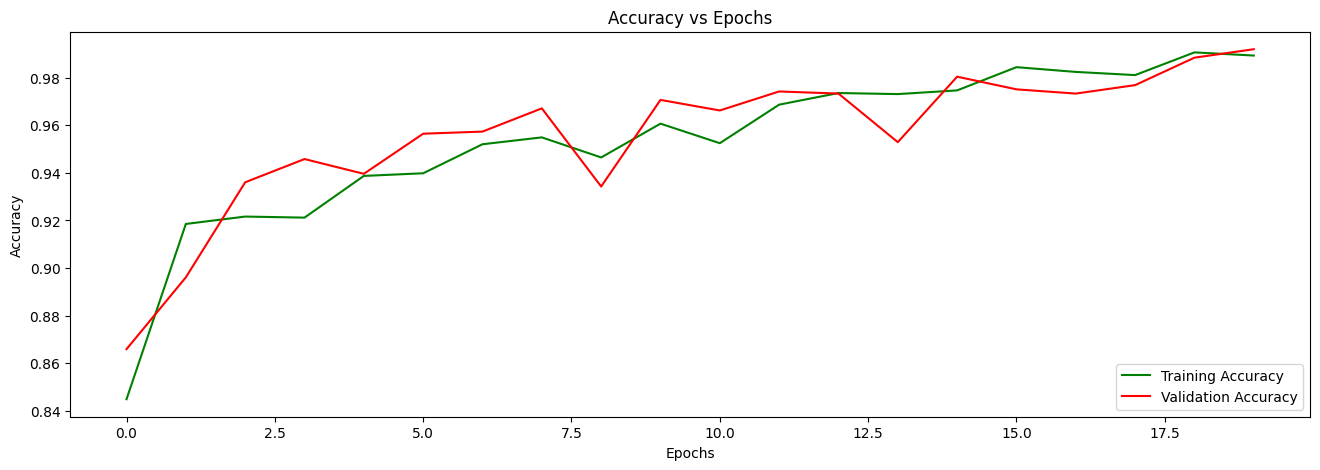

In [36]:
# accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

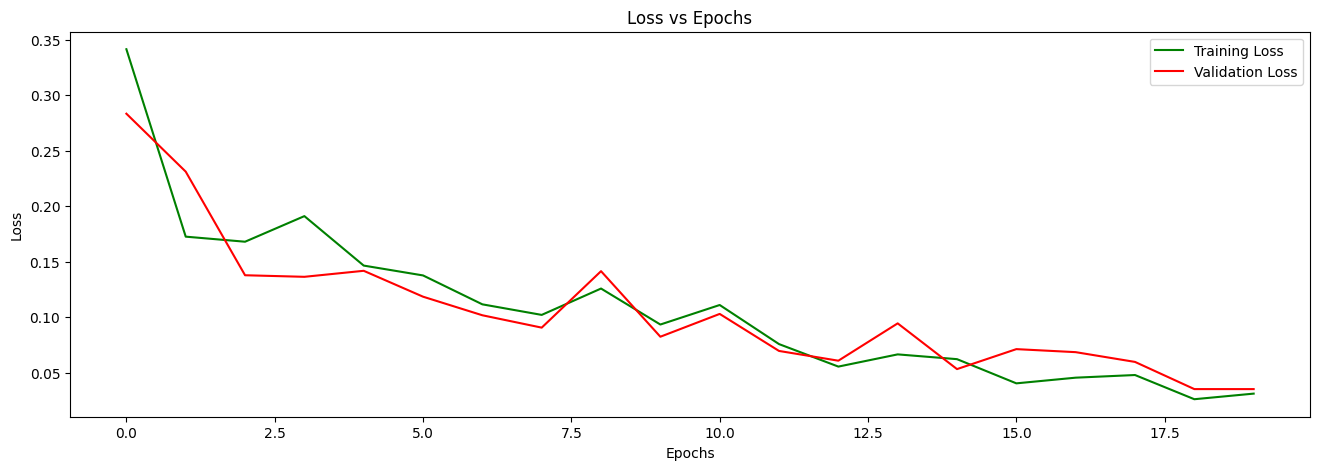

In [37]:
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

## Prediction trials

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


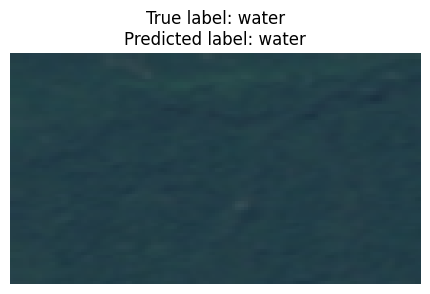

In [38]:
# Predicting one image from the validation dataset
plt.figure(figsize=(6, 3))  
for images, labels in val.take(1):
    sample_image = images[1]
    true_label = labels[1]

    sample_image = tf.expand_dims(sample_image, axis=0)

    predictions = model.predict(sample_image)

    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class = classes[predicted_class_index]

    plt.imshow(sample_image[0].numpy().astype("uint8"))
    plt.title(f"True label: {classes[true_label.numpy()]}\nPredicted label: {predicted_class}")
    plt.axis('off')

plt.show()